# Import libraries and data file from Task 6.3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Imported path
path = r'/Users/james/Desktop/Task6'

In [4]:
path

'/Users/james/Desktop/Task6'

In [5]:
df = pd.read_csv('/Users/james/Desktop/Task6/RentalTask6_3.csv')

# Data check and clean

In [6]:
df.head()

,Unnamed: 0,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,...,geo_plz,noRooms,floor,garden,regio2,regio3,numberOfYear,Pricepm2,additioncost,Price category
0,0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,True,...,44269,4.0,1.0,True,Dortmund,Schüren,58.0,6.918605,245.0,Middle price
1,2,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,True,...,1097,3.0,3.0,False,Dresden,Äußere_Neustadt_Antonstadt,4.0,11.515513,335.0,Middle price
2,4,Bremen,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,False,...,28213,3.0,1.0,False,Other,Neu_Schwachhausen,73.0,9.003178,138.0,Middle price
3,6,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,True,...,9599,2.0,1.0,True,Mittelsachsen_Kreis,Freiberg,65.0,5.000000,70.0,Middle price
4,8,Baden_Württemberg,110.0,oil_heating,False,False,690.0,1970.0,True,True,...,79211,2.0,2.0,False,Other,Denzlingen,53.0,10.943396,110.0,Middle price


In [7]:
# rename columns for regio
df.rename(columns={'regio1': 'state', 'regio2': 'district', 'regio3': 'town'}, inplace=True)

In [8]:
# drop unnamed column 
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,livingSpace,...,geo_plz,noRooms,floor,garden,district,town,numberOfYear,Pricepm2,additioncost,Price category
0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,True,86.00,...,44269,4.0,1.0,True,Dortmund,Schüren,58.0,6.918605,245.0,Middle price
1,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,True,83.80,...,1097,3.0,3.0,False,Dresden,Äußere_Neustadt_Antonstadt,4.0,11.515513,335.0,Middle price
2,Bremen,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,False,84.97,...,28213,3.0,1.0,False,Other,Neu_Schwachhausen,73.0,9.003178,138.0,Middle price
3,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,True,62.00,...,9599,2.0,1.0,True,Mittelsachsen_Kreis,Freiberg,65.0,5.000000,70.0,Middle price
4,Baden_Württemberg,110.0,oil_heating,False,False,690.0,1970.0,True,True,53.00,...,79211,2.0,2.0,False,Other,Denzlingen,53.0,10.943396,110.0,Middle price


In [10]:
df.shape

(159000, 24)

In [11]:
# Check for missing values
df.isnull().sum()

state              0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
cellar             0
livingSpace        0
condition          0
lift               0
baseRentRange      0
typeOfFlat         0
geo_plz            0
noRooms            0
floor              0
garden             0
district           0
town               0
numberOfYear       0
Pricepm2           0
additioncost       0
Price category     0
dtype: int64

/var/folders/74/9rw7v5ds2rngkmrtrcd41vp40000gn/T/ipykernel_14100/3649451012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totalRent'],bins = 25, kde = True)


<Axes: xlabel='totalRent', ylabel='Density'>

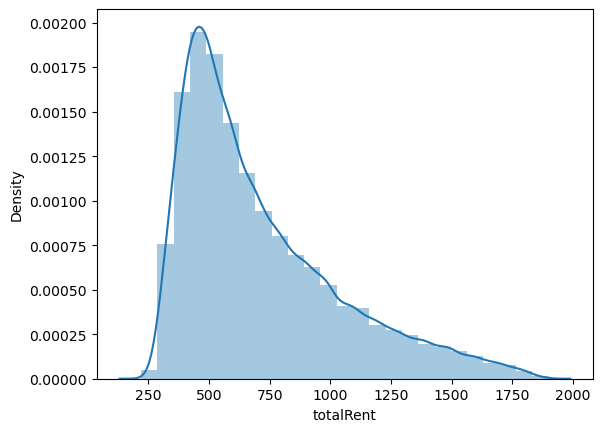

In [12]:
# Check for extreme values
sns.distplot(df['totalRent'],bins = 25, kde = True)

In [13]:
# Check Mean
df['totalRent'].mean()

713.663174654088

In [14]:
# Check median
df['totalRent'].median()

614.0

In [15]:
# Check max
df['totalRent'].max()

1900.0

In [16]:
# Check min
df['totalRent'].min()

220.0

In [17]:
df['totalRent'].max()-df['totalRent'].min()

1680.0

In [18]:
df.describe()

,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,geo_plz,noRooms,floor,numberOfYear,Pricepm2,additioncost
count,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.000000,159000.00000
mean,141.391456,713.663175,1964.941377,69.520427,3.423277,34635.114258,2.585603,1.976063,58.058623,7.888023,163.76789
std,60.865777,327.031485,33.998053,22.109472,1.928746,27194.882985,0.833718,1.331653,33.998053,3.087395,58.85309
min,0.000000,220.000000,1862.000000,11.000000,1.000000,1057.000000,1.000000,-1.000000,-6.000000,2.080000,1.00000
25%,99.000000,465.000000,1950.000000,55.000000,2.000000,9111.000000,2.000000,1.000000,31.000000,5.504899,120.00000
50%,132.525000,614.000000,1963.000000,66.000000,3.000000,34128.000000,3.000000,2.000000,60.000000,7.000000,151.00000
75%,180.000000,890.000000,1992.000000,81.950000,5.000000,52062.000000,3.000000,3.000000,73.000000,9.523810,200.00000
max,368.000000,1900.000000,2029.000000,144.020000,8.000000,99994.000000,5.500000,6.000000,161.000000,20.566038,351.00000


# Data prep for regression analysis

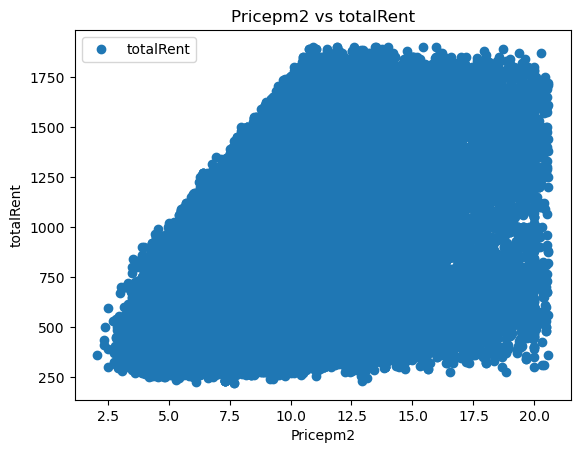

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Pricepm2', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Pricepm2 vs totalRent')  
plt.xlabel('Pricepm2')  
plt.ylabel('totalRent')  
plt.show()

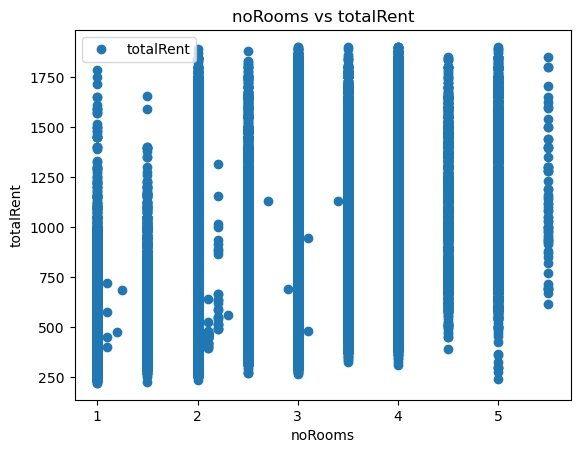

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'noRooms', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('noRooms vs totalRent')  
plt.xlabel('noRooms')  
plt.ylabel('totalRent')  
plt.show()

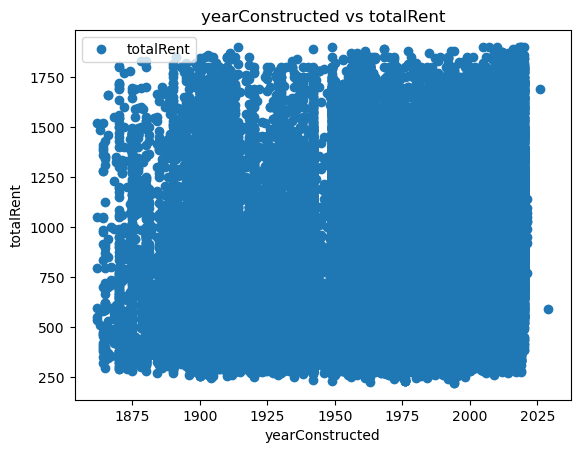

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'yearConstructed', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('yearConstructed vs totalRent')  
plt.xlabel('yearConstructed')  
plt.ylabel('totalRent')  
plt.show()

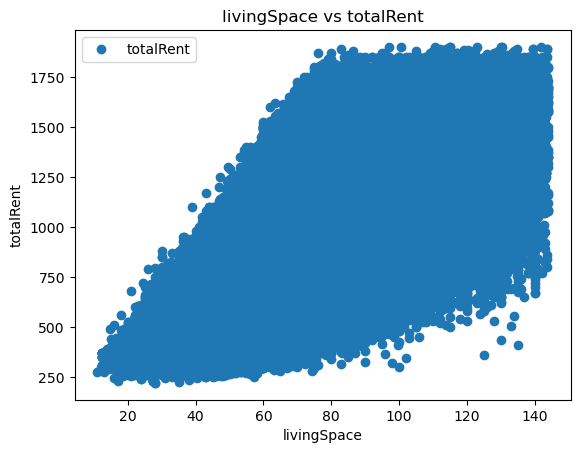

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('livingSpace vs totalRent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['noRooms'].values.reshape(-1,1)
y = df['totalRent'].values.reshape(-1,1)

In [24]:
X

array([[4. ],
       [3. ],
       [3. ],
       ...,
       [3. ],
       [3.5],
       [4. ]])

In [25]:
y

array([[ 840.],
       [1300.],
       [ 903.],
       ...,
       [ 670.],
       [1150.],
       [ 930.]])

In [26]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# Regression Analysis

In [27]:
# Create regression object
regression = LinearRegression()

In [28]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

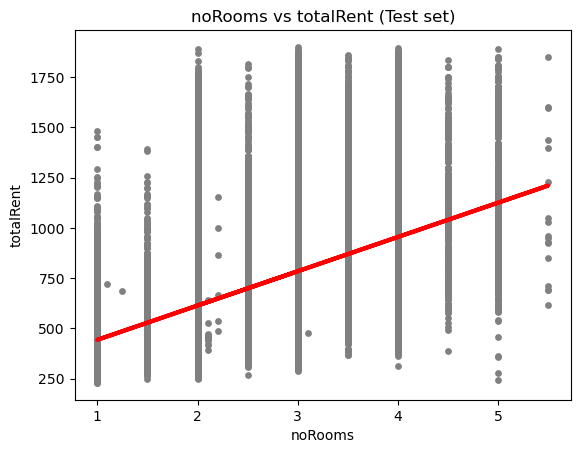

In [30]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('noRooms vs totalRent (Test set)')
plot_test.xlabel('noRooms')
plot_test.ylabel('totalRent')
plot_test.show()

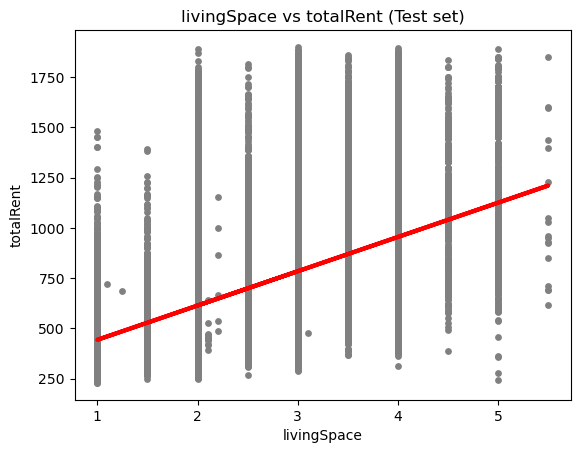

In [31]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

In [32]:
# 

In [33]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [34]:
# above are MSE and R2 scores 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[170.50625385]]
Mean squared error:  85864.79615015582
R2 score:  0.1931182547397996


In [36]:
# Large MSE and 0.19 R2 Score indicates model is not a good forecast fit # 

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1100.00,784.353542
1,1154.25,647.948539
2,360.00,613.847288
3,718.00,613.847288
4,485.00,528.594161
5,493.00,954.859796
6,580.00,613.847288
7,403.00,613.847288
8,1175.00,613.847288
9,553.00,869.606669


In [38]:
# Compare how the regression fits the training set

In [39]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[170.50625385]]
Mean squared error:  87022.4051875496
R2 score:  0.18805213414515987


In [42]:
# Visualizing the training set results

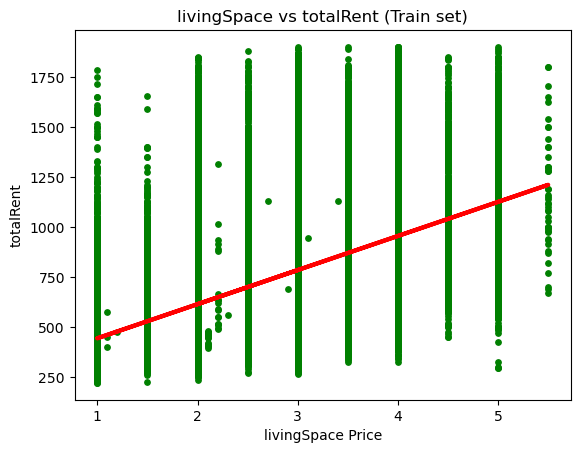

In [43]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Train set)')
plot_test.xlabel('livingSpace Price')
plot_test.ylabel('totalRent')
plot_test.show()

In [44]:
# Train set continues to show high MSE and low R2 indicating it is not a good modelling base #  

In [45]:
# Regression on df of total rent 614 and higher

In [46]:
df2 = df[df['totalRent']>=614]
df2

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,livingSpace,...,geo_plz,noRooms,floor,garden,district,town,numberOfYear,Pricepm2,additioncost,Price category
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.00,1965.0,False,True,86.00,...,44269,4.0,1.0,True,Dortmund,Schüren,58.0,6.918605,245.00,Middle price
1,Sachsen,255.00,floor_heating,True,True,1300.00,2019.0,False,True,83.80,...,1097,3.0,3.0,False,Dresden,Äußere_Neustadt_Antonstadt,4.0,11.515513,335.00,Middle price
2,Bremen,138.00,self_contained_central_heating,False,True,903.00,1950.0,False,False,84.97,...,28213,3.0,1.0,False,Other,Neu_Schwachhausen,73.0,9.003178,138.00,Middle price
4,Baden_Württemberg,110.00,oil_heating,False,False,690.00,1970.0,True,True,53.00,...,79211,2.0,2.0,False,Other,Denzlingen,53.0,10.943396,110.00,Middle price
7,Nordrhein_Westfalen,200.00,central_heating,False,False,1150.00,1951.0,False,False,123.44,...,59065,4.0,4.0,False,Other,Mitte,72.0,7.696047,200.00,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158991,Nordrhein_Westfalen,180.00,self_contained_central_heating,False,False,920.00,1958.0,False,False,97.93,...,41462,3.0,4.0,False,Other,Neuss,65.0,7.556418,180.00,Middle price
158993,Hessen,112.13,district_heating,False,True,1479.64,2016.0,True,True,89.67,...,60435,3.0,2.0,True,Frankfurt_am_Main,Preungesheim,7.0,14.000000,224.26,Middle price
158997,Nordrhein_Westfalen,80.00,gas_heating,False,False,670.00,1949.0,False,False,85.00,...,45279,3.0,3.0,False,Essen,Horst,74.0,6.941176,80.00,Middle price
158998,Hessen,220.00,gas_heating,False,True,1150.00,1983.0,True,False,115.00,...,68519,3.5,1.0,False,Other,Viernheim,40.0,8.086957,220.00,High price


In [47]:
df2.describe()

,serviceCharge,totalRent,yearConstructed,livingSpace,baseRentRange,geo_plz,noRooms,floor,numberOfYear,Pricepm2,additioncost
count,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000,79514.000000
mean,174.959006,962.459140,1972.249994,82.785264,5.030259,43165.318108,2.889577,1.867244,50.750006,9.497194,197.570345
std,60.507384,288.434127,36.049070,21.074389,1.324830,26915.003264,0.806900,1.290181,36.049070,3.062105,57.771555
min,0.000000,614.000000,1862.000000,21.000000,1.000000,1067.000000,1.000000,-1.000000,-3.000000,3.000000,1.000000
25%,130.000000,728.000000,1956.000000,68.000000,4.000000,21029.000000,2.000000,1.000000,22.000000,7.198972,155.000000
50%,170.000000,890.000000,1971.000000,80.000000,5.000000,44267.000000,3.000000,2.000000,52.000000,9.000000,197.000000
75%,210.000000,1135.000000,2001.000000,95.770000,6.000000,63505.000000,3.000000,3.000000,67.000000,11.100017,237.637500
max,368.000000,1900.000000,2026.000000,144.020000,8.000000,99994.000000,5.500000,6.000000,161.000000,20.566038,351.000000


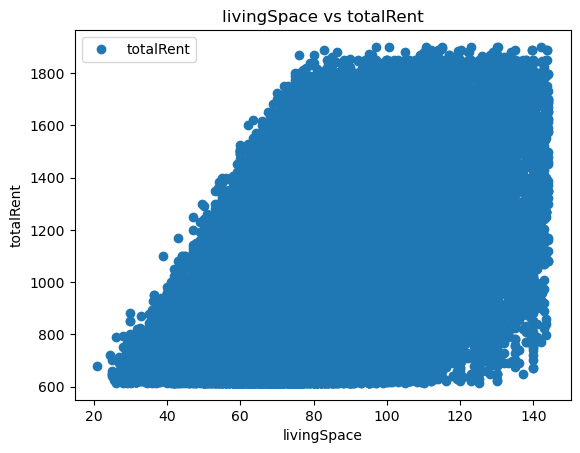

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'livingSpace', y='totalRent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('livingSpace vs totalRent')  
plt.xlabel('livingSpace')  
plt.ylabel('totalRent')  
plt.show()

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['livingSpace'].values.reshape(-1,1)
y = df2['totalRent'].values.reshape(-1,1)

In [50]:
X

array([[ 86.  ],
       [ 83.8 ],
       [ 84.97],
       ...,
       [ 85.  ],
       [115.  ],
       [ 95.  ]])

In [51]:
y

array([[ 840.],
       [1300.],
       [ 903.],
       ...,
       [ 670.],
       [1150.],
       [ 930.]])

In [52]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [53]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [54]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

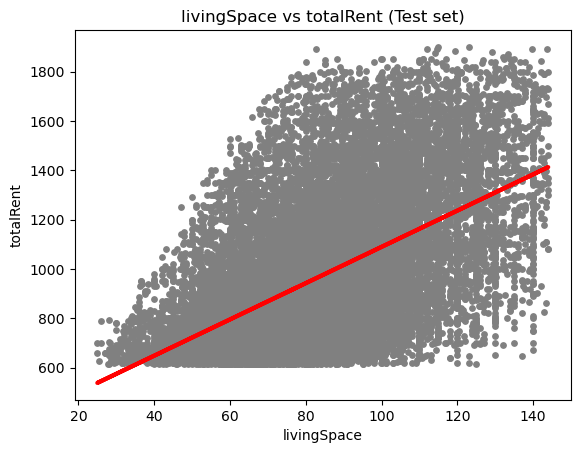

In [56]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('livingSpace vs totalRent (Test set)')
plot_test.xlabel('livingSpace')
plot_test.ylabel('totalRent')
plot_test.show()

In [57]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7.35050406]]
Mean squared error:  59217.123764025346
R2 score:  0.2866071375046939


In [59]:
# Slope reduced greatly, but MSE remains high and R2 low # 

In [60]:
# additional Hypothesis required to determine correlation between totalRent and other variables # 